# Peningkatan atau pengurangan Curah Hujan

In [1]:
import glob
import xlsxwriter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
import xarray as xr


from netCDF4 import Dataset
#Import os, os environ untuk mengatasi error pada basemap, kalau basemapnya ngga error hapus aja
#Sesuaikan letak file epsg di komputer
import os 
os.environ["PROJ_LIB"] = "C:\\Users\\Lenovo\\anaconda3\\pkgs\\proj4-5.2.0-h6538335_1006\\Library\\share"; #fixr
from mpl_toolkits.basemap import cm
from mpl_toolkits.basemap import Basemap

In [2]:
# baca semua lokasi data TRMM

path = glob.glob('data selisih/*.nc4', recursive=True)

pathfiles = []
for filename in path:
    pathfiles.append(filename)
pathfiles = np.array(pathfiles)
print(pathfiles)

['data selisih\\3B42_Daily.20120701.7.nc4.nc4'
 'data selisih\\3B42_Daily.20120702.7.nc4.nc4'
 'data selisih\\3B42_Daily.20120703.7.nc4.nc4'
 'data selisih\\3B42_Daily.20120704.7.nc4.nc4'
 'data selisih\\3B42_Daily.20120705.7.nc4.nc4'
 'data selisih\\3B42_Daily.20120706.7.nc4.nc4'
 'data selisih\\3B42_Daily.20120707.7.nc4.nc4'
 'data selisih\\3B42_Daily.20120708.7.nc4.nc4'
 'data selisih\\3B42_Daily.20120709.7.nc4.nc4'
 'data selisih\\3B42_Daily.20120710.7.nc4.nc4'
 'data selisih\\3B42_Daily.20120711.7.nc4.nc4'
 'data selisih\\3B42_Daily.20120712.7.nc4.nc4'
 'data selisih\\3B42_Daily.20120713.7.nc4.nc4'
 'data selisih\\3B42_Daily.20120714.7.nc4.nc4'
 'data selisih\\3B42_Daily.20120715.7.nc4.nc4'
 'data selisih\\3B42_Daily.20120716.7.nc4.nc4'
 'data selisih\\3B42_Daily.20120717.7.nc4.nc4'
 'data selisih\\3B42_Daily.20120718.7.nc4.nc4'
 'data selisih\\3B42_Daily.20120719.7.nc4.nc4'
 'data selisih\\3B42_Daily.20120720.7.nc4.nc4'
 'data selisih\\3B42_Daily.20120721.7.nc4.nc4'
 'data selisi

In [3]:
# baca semua data TRMM dan ambil variabel hujan

nt = pathfiles.size
pr = np.empty(shape=(nt,81,181))

for i in range(nt):
    data = Dataset(pathfiles[i])
    pr[i,:,:] = data['precipitation'][:].T

In [4]:
nt

615

In [5]:
lat = data['lat'][:]
lon = data['lon'][:]
lons, lats = np.meshgrid(lon,lat)

In [6]:
# akumulasi data harian menjadi bulanan
pr_das = np.empty(shape=(int(nt/30),81,181))
j = 0

for i in range(int(nt/30)):
    das = sum(pr[j:j+30,:,:])
    pr_das[i,:,:] = das
    j=j+30

In [7]:
print(pr_das)

[[[2.62500000e+01 2.64599995e+01 3.47100006e+01 ... 3.99299987e+01
   4.26899991e+01 2.62799997e+01]
  [1.61700002e+01 2.07299993e+01 2.66699982e+01 ... 3.41399993e+01
   3.07199996e+01 2.37299997e+01]
  [5.00999967e+00 1.56299998e+01 1.68899985e+01 ... 4.01399993e+01
   2.99399998e+01 2.08500000e+01]
  ...
  [3.30449995e+02 3.51480009e+02 3.66419989e+02 ... 4.41809979e+02
   4.26719990e+02 3.45509990e+02]
  [2.48369996e+02 2.41919993e+02 2.43539995e+02 ... 3.73199987e+02
   4.78049979e+02 4.05269991e+02]
  [2.65529987e+02 2.41379996e+02 1.93920000e+02 ... 4.61969986e+02
   4.45679984e+02 4.67099996e+02]]

 [[5.90999974e+00 3.38999986e+00 3.08999991e+00 ... 5.93999995e+00
   3.05999999e+00 5.03999963e+00]
  [3.56999981e+00 5.36999974e+00 5.00999986e+00 ... 5.54999951e+00
   4.04999968e+00 4.16999974e+00]
  [4.55999994e+00 8.00999960e+00 5.21999991e+00 ... 7.82999969e+00
   5.01000005e+00 3.32999985e+00]
  ...
  [3.28500002e+02 2.64689993e+02 2.13899992e+02 ... 5.10359985e+02
   5.57039

In [8]:
pr_das.shape

(20, 81, 181)

In [9]:
#hitung rata-rata bulan juli,ags,sept,okt dari data historis tahun 2012-2016
hujan = np.empty([4, 81,181])
for i in range(4):
    for j in range(81):
        for k in range(181):
            hujan[i,j,k] = np.mean(pr_das[i:20:4,j,k])

In [10]:
#hujan.shape
#banding=pr_das[1,:,:]-pr_das[2,:,:]
pr_das[19,:,:]

array([[159.74999908, 158.33999497, 138.14999771, ...,  14.93999952,
         12.41999935,  13.22999959],
       [177.47999515, 179.63999724, 187.76999748, ...,  21.83999869,
         14.0399999 ,  18.92999876],
       [218.51999871, 230.87999463, 243.86999331, ...,  33.92999858,
         28.13999879,  29.00999856],
       ...,
       [193.55999553, 214.10999393, 224.93999293, ..., 610.10998046,
        595.23000328, 583.67999113],
       [229.37999225, 252.08998591, 242.51999468, ..., 573.65997615,
        556.67999399, 518.30999696],
       [240.92999828, 274.34998602, 282.08999366, ..., 594.26998518,
        528.83999157, 551.58000827]])

In [202]:
#banding=pr_das[12,:,:]-hujan[0,:,:] #selisih juli 2015 dengan juli data historis
#banding=pr_das[13,:,:]-hujan[1,:,:] #selisih Agustus 2015 dengan Agustus data historis
#banding=pr_das[14,:,:]-hujan[2,:,:] #selisih September 2015 dengan September data historis
#banding=pr_das[15,:,:]-hujan[3,:,:] #selisih Oktober 2015 dengan Oktober data historis
#b
#banding=pr_das[16,:,:]-hujan[0,:,:] #selisih juli 2016 dengan juli data historis
#banding=pr_das[17,:,:]-hujan[1,:,:] #selisih Agustus 2016 dengan Agustus data historis
#banding=pr_das[18,:,:]-hujan[2,:,:] #selisih September 2016 dengan September data historis
banding=pr_das[19,:,:]-hujan[3,:,:] #selisih Oktober 2016 dengan Oktober data historis

In [203]:
#levels=[-12,-9,-6,-3,0,3,6,9,12],
#print(banding)
sumatera=banding[0:43,144:176]
sumatera.mean()

78.24108322643903

In [13]:
lat = data['lat'][:]
lon = data['lon'][:]
lons, lats = np.meshgrid(lon,lat)

In [76]:
#SUMATERA, lon=0-48, Lat=0-67
#Kalimantan, Lon=56-96, Lat=26-59
#Jawa, Lon=40-80, Lat=0-18
#Sulawesi, Lon=96-120, Lat=18-51
#Bali dan NT, Lon=80-128, Lat=0-8
#Maluku, Lon=128-144, Lat=26-51
#Papua, Lon=144-176, Lat=0-43
np.where(lats==0.125)

(array([43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43,
        43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43,
        43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43,
        43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43,
        43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43,
        43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43,
        43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43,
        43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43,
        43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43,
        43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43,
        43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43], dtype=int64),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,

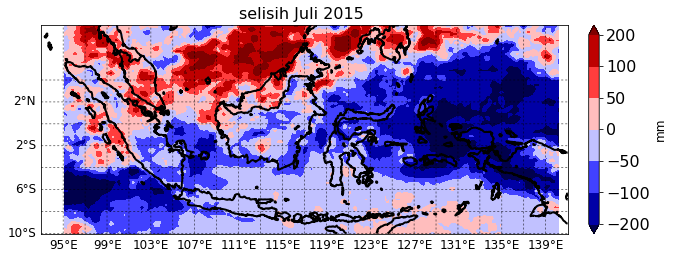

In [14]:
for i in range(1):
    fig = plt.figure(figsize=(10,10))
    #levels = np.arange(50,270,10)

    bm = Basemap(projection='cyl', llcrnrlon=93, llcrnrlat=-10,
                 urcrnrlon=141, urcrnrlat=9, resolution='i') 

    # Add geographic outlines
    bm.drawcoastlines(color='black', linewidth=2, zorder=2)
    bm.drawstates(linewidth=2)
    bm.drawcountries(linewidth=2)

    # Draw parallels and meridians
    bm.drawparallels(np.arange(-10, 6, 2), labels=[0, 0, 0, 0], linewidth=0.5, dashes=[4, 4], fontsize=12) # lat grid
    bm.drawmeridians(np.arange(95, 141, 2), labels=[0, 0, 0, 0], linewidth=0.5, dashes=[4, 4], fontsize=12) # lon grid
    bm.drawparallels(np.arange(-10, 6, 4), labels=[1, 0, 0, 0], linewidth=0, dashes=[4, 4], fontsize=12) # lat text
    bm.drawmeridians(np.arange(95, 141, 4), labels=[0, 0, 0, 1], linewidth=0, dashes=[4, 4], fontsize=12) # lon text
    
    contourf = bm.colorbar(bm.contourf(lons, lats, banding[:,:],levels=[-200,-100,-50,0,50,100,200], cmap='seismic', extend='both', zorder=1),
                           location='right', size='2%', pad='4%')
    #contourf = bm.contourf(lons, lats, pr_das[i,:,:],levels=levels, cmap='Blues', extend='both'zorder=1),
                           #location='right', size='2%', pad='4%')
    contourf.set_label('mm', fontsize=12)
    contourf.ax.tick_params(labelsize=16)

    # Add title
    plt.title("selisih Juli 2015 ", fontsize=16)

    # Save image
    #fig.savefig("Selisih Juli 2015 "+".png", bbox='tight', dpi=100)